# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load packages
import pickle
import matplotlib.pyplot as plt
from random import randrange
import numpy as np
import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import matplotlib.gridspec as gridspec
import cv2
import tensorflow as tf

# Visualizations will be shown in the notebook.
%matplotlib inline

if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [2]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(y_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 34799


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Print list of sign names
df = pd.read_csv('signnames.csv')
print ('List of signs')

print (df.loc[: , "SignName"]) 

List of signs
0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vehicles
16             Vehicles over 3.5 metric tons prohibited
17                                

In [5]:
signnames_file = 'signnames.csv'
signnames_df = pd.read_csv(signnames_file)
signnames_df.columns=['id','sign_name']
signnames_df

id                                          sign_name
0    0                               Speed limit (20km/h)
1    1                               Speed limit (30km/h)
2    2                               Speed limit (50km/h)
3    3                               Speed limit (60km/h)
4    4                               Speed limit (70km/h)
5    5                               Speed limit (80km/h)
6    6                        End of speed limit (80km/h)
7    7                              Speed limit (100km/h)
8    8                              Speed limit (120km/h)
9    9                                         No passing
10  10       No passing for vehicles over 3.5 metric tons
11  11              Right-of-way at the next intersection
12  12                                      Priority road
13  13                                              Yield
14  14                                               Stop
15  15                                        No vehicles
16  16           Vehicles over 3.5 metric tons prohibited
17  17                                           No entry
18  18                                    General caution
19  19                        Dangerous curve to the left
20  20                       Dangerous curve to the right
21  21                                       Double curve
22  22                                         Bumpy road
23  23                                      Slippery road
24  24                          Road narrows on the right
25  25                                          Road work
26  26                                    Traffic signals
27  27                                        Pedestrians
28  28                                  Children crossing
29  29                                  Bicycles crossing
30  30                                 Beware of ice/snow
31  31                              Wild animals crossing
32  32                End of all speed and passing limits
33  33                                   Turn right ahead
34  34                                    Turn left ahead
35  35                                         Ahead only
36  36                               Go straight or right
37  37                                Go straight or left
38  38                                         Keep right
39  39                                          Keep left
40  40                               Roundabout mandatory
41  41                                  End of no passing
42  42  End of no passing by vehicles over 3.5 metric ...



Sample images




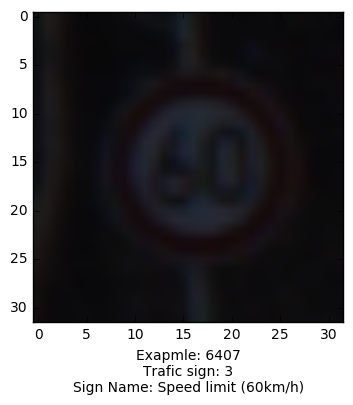

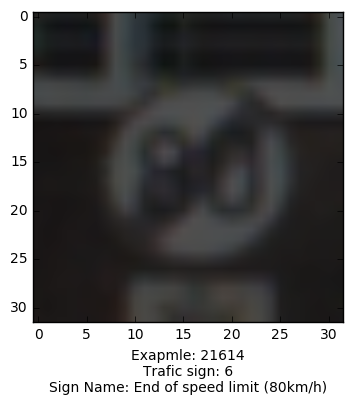

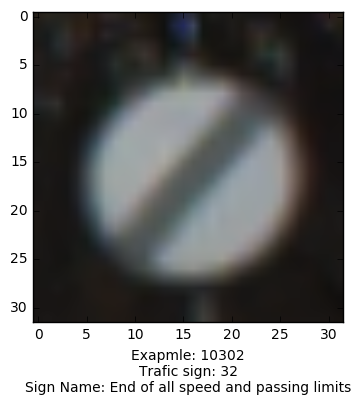

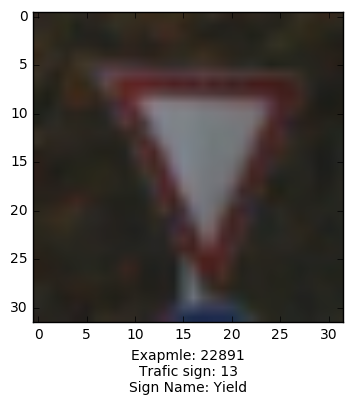

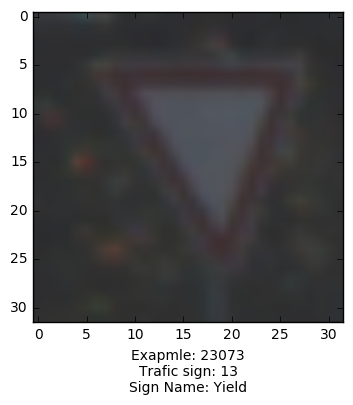

In [6]:
# Show samples of images
print('\n'*2 + 'Sample images' + '\n'*2)
for i in range(5):
    k = randrange(n_train)
    label = 'Exapmle: ' + str(k) +'\nTrafic sign: ' + str(y_train[k]) + '\nSign Name: ' + str(df.loc[y_train[k], "SignName"]) 
    
    plt.xlabel(label)
    plt.imshow(X_train[k])
    plt.figure()


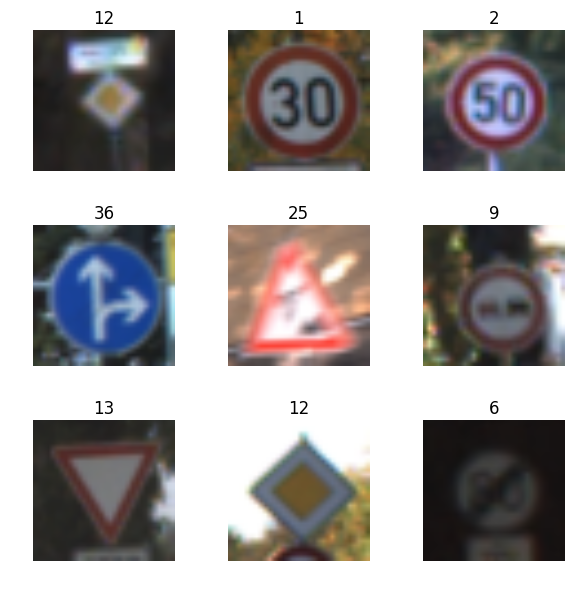

In [7]:
# Show samples of images

number_samples = 9
random_sample = np.random.randint(0, n_train, number_samples)
sample_images = X_train[random_sample]
#sample_labels = list(map(label_descriptions.get, y_train[random_sample]))
sample_labels = list(y_train[random_sample])


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(2*3, 2*3))
axes = axes.ravel()
fig.tight_layout()

for ax, img, label in zip(axes, sample_images, sample_labels):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

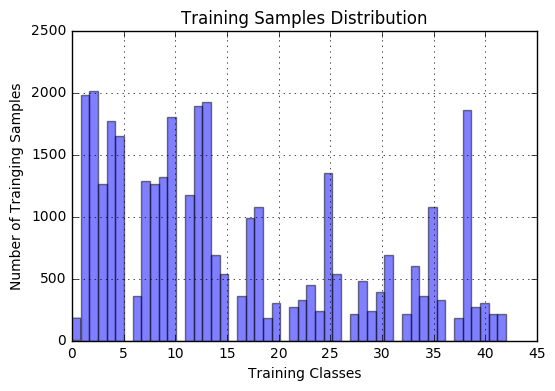

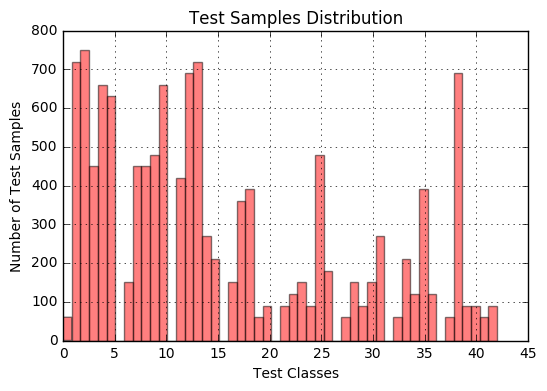

In [8]:
# Show the distribution of classes in the training and test sets
# the histogram of the data
plt.figure(1)
#n, bins, patches = 
plt.hist(y_train, 50, facecolor='blue', alpha=0.5)

plt.xlabel('Training Classes')
plt.ylabel('Number of Trainging Samples')
plt.title('Training Samples Distribution')
plt.grid(True)

plt.figure(2)
#n, bins, patches = 
plt.hist(y_test, 50, facecolor='red', alpha=0.5)

plt.xlabel('Test Classes')
plt.ylabel('Number of Test Samples')
plt.title('Test Samples Distribution')
plt.grid(True)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Shuffle training examples



X_train_original = X_train
X_test_original = X_test
y_train_original = y_train
y_test_original = y_test

X_train, y_train = shuffle(X_train, y_train)


def image_grayscale(images):
    images = tf.image.rgb_to_grayscale(images)
    images = tf.Session().run(images)
    return images

# Normalise input (images still in colour)
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

X_train_grayscale = image_grayscale(X_train)
X_test_grayscale = image_grayscale(X_test)



### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

We use image augmentation to generate additional data to train model. We used function proposed by Vivek Yadav. Function used brightness augmentation and transformation of images (rotation, translation, shear, brightness).

See additional information:

https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3#.c38crecmo

https://github.com/vxy10/ImageAugmentation

In [11]:
# Image augmentation to generate additional data to train.
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

print ('Show sample of image augmentation')

k = randrange(n_train)
label = 'Exapmle: ' + str(k) +'\nTrafic sign: ' + str(y_train[k]) + '\nSign Name: ' + str(df.loc[y_train[k], "SignName"]) 
plt.xlabel(label)
image = X_train[k]
plt.imshow(image);


gs1 = gridspec.GridSpec(5, 5)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(25):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5,brightness=1)

    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


# Data preparation
# Split data into train and validation datasets




#from tqdm import tqdm
#from skimage import exposure

### Histogram Equilization
#def normalized_image(image_data):
    #with warnings.catch_warnings():
    #    warnings.simplefilter("ignore")
#        return np.array([exposure.equalize_adapthist(features, clip_limit=0.03) for features in tqdm(image_data)])

#def normalized_image2(image_data):
#    return (image_data - image_data.mean()) / (np.max(image_data) - np.min(image_data)) 
#for image_data in tqdm(image_data)])

#X_train = normalized_image2(X_train)
#X_train = normalized_image2(X_train)
#X_test = normalized_image2(X_test)
#X_test = normalized_image2(X_test)

    
# Normalise input (images still in colour)
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))







[24490  3952 20067 25128 29645 26419  9007 16700 23492]


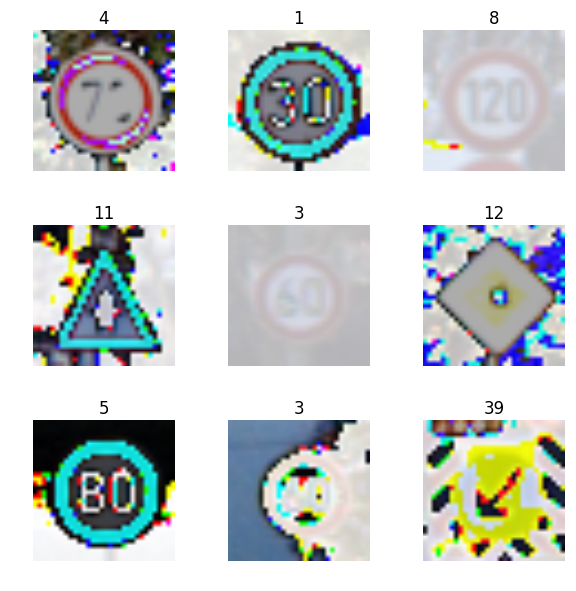

In [14]:
# Show samples of images after normalization

number_samples = 9
random_sample = np.random.randint(0, n_train, number_samples)
print (random_sample)
sample_images = X_train[random_sample]

#sample_labels = list(map(label_descriptions.get, y_train[random_sample]))
sample_labels = list(y_train[random_sample])


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(2*3, 2*3))
axes = axes.ravel()
fig.tight_layout()

for ax, img, label in zip(axes, sample_images, sample_labels):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

In [15]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 128



In [17]:
# One hot
#from sklearn.preprocessing import OneHotEncoder

def one_hot():
    with tf.device('/cpu:0'):
        x = tf.placeholder(tf.float32, (None, 32, 32, 3))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, n_classes)
    return

#enc = OneHotEncoder()
#enc.fit(y_train)
#one_hot_sklearn = enc.transform(y_train).toarray()



In [18]:
# LeNet implementation

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    with tf.device('/cpu:0'):
        # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1)

        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2)

        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(conv2)

        # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1)

        # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b

        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2)

        # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(n_classes))
        logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [19]:
with tf.device('/cpu:0'):
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)

In [20]:
rate = 0.001
logits = LeNet(x)
with tf.device('/cpu:0'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
    
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [21]:
with tf.device('/cpu:0'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

def evaluate(X_data, y_data):
   
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:

    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './models/lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.529

EPOCH 2 ...
Validation Accuracy = 0.818

EPOCH 3 ...
Validation Accuracy = 0.915

EPOCH 4 ...
Validation Accuracy = 0.942

EPOCH 5 ...
Validation Accuracy = 0.957

EPOCH 6 ...
Validation Accuracy = 0.952

EPOCH 7 ...
Validation Accuracy = 0.972

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.971

EPOCH 10 ...
Validation Accuracy = 0.975

Model saved


We will use Keras for faster prototyping.
Testing 
1. LeNet
2. CNN
To show the scheme we use model.summary()

In [23]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
one_hot_y = y_one_hot

# TODO: Build a model
from keras.models import Sequential

from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.models import save_model

X_normalized, y_one_hot = X_train, one_hot_y 
IMG_SIZE = 32

def LeNet():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model


model = LeNet()

model.summary()
# TODO: Compile and train the model
model.compile('adam', 'categorical_crossentropy', ['accuracy'])


# Compile and train the model. Early stopping to interrupt training when the validation loss isn't decreasing anymore
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_normalized, one_hot_y, nb_epoch=20, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

model.save('my_model_lenet.h5')
print('Model saved into file: my_model_lenet.h5 ')

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 30, 30, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 15, 15, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 15, 15, 32)    0           maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 15, 15, 32)    0           dropout_1[0][0]                  
___________________________________________________________________________________________

In [24]:
from keras.models import Sequential
from keras.models import load_model
#from keras.models import predict

model = load_model('my_model_lenet.h5')
print('Model loaded from file: my_model_lenet.h5 ')

#X_test = np.array(X_test)
#y_test = np.array(y_test)
#X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
#X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

#model.predict(x, batch_size=32, verbose=0)
y_pred = model.predict_classes(X_test)
acc = np.sum(y_pred==y_test)/np.size(y_pred)

print("Test accuracy = {}".format(acc))
#X_valid = (X_valid - X_valid.mean()) / (np.max(X_valid) - np.min(X_valid))
#model.predict(x, batch_size=32, verbose=0)
y_pred = model.predict_classes(X_valid)
acc = np.sum(y_pred==y_valid)/np.size(y_pred)

print("Test accuracy = {}".format(acc))

Model loaded from file: my_model_lenet.h5 
12630/12630 [==============================] - 9s     
Test accuracy = 0.897624703087886
4288/4410 [============================>.] - ETA: 0sTest accuracy = 0.8215419501133787


In [25]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
one_hot_y = y_one_hot

# TODO: Build a model
from keras.models import Sequential

from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.models import save_model

X_normalized, y_one_hot = X_train, one_hot_y 
IMG_SIZE = 32

# number of classes
nb_classes = 43
# input image dimensions
img_rows, img_cols, img_ch = 32, 32, 3
# number of convolutional filters to use
nb_filter1 = 32
nb_filter2 = 64
nb_filter3 = 128
# size of pooling area for max pooling
pool_size = (2, 2)
pool_strides = (1,1)
# convolution kernel size
kernel_size = (5, 5)
# number of hidden units in the first fully connected layer
nb_fc1=128
nb_fc2=128




def cnn():
    model = Sequential()
    model.add(Convolution2D(nb_filter1, kernel_size[0], kernel_size[1],border_mode='same', subsample=(1,1),
                            input_shape=(img_rows,img_cols,img_ch),name='conv1'))
    model.add(Activation('relu',name='relu1'))
    model.add(MaxPooling2D(pool_size=pool_size,strides=pool_strides,name='maxpool1'))
    model.add(Convolution2D(nb_filter2, kernel_size[0], kernel_size[1],border_mode='same',subsample=(1,1),
                            name='conv2'))
    model.add(Activation('relu',name='relu2'))
    model.add(MaxPooling2D(pool_size=pool_size,strides=None,name='maxpool2'))
    model.add(Convolution2D(nb_filter2, kernel_size[0], kernel_size[1],border_mode='same',subsample=(1,1),
                            name='conv3'))
    model.add(Activation('relu',name='relu3'))
    model.add(MaxPooling2D(pool_size=pool_size,strides=None,name='maxpool3'))
    model.add(Flatten(name='flatten'))
    model.add(Dropout(0.5,name='dropout1'))
    model.add(Dense(nb_fc1, name='hidden1'))
    model.add(Activation('relu',name='relu4'))
    model.add(Dropout(0.5,name='dropout2'))
    model.add(Dense(nb_fc2,  name='hidden2'))
    model.add(Activation('relu',name='relu5'))
    model.add(Dense(nb_classes, name='output'))
    model.add(Activation('softmax',name='softmax'))
    return model

   


model = cnn()
model.summary()

# TODO: Compile and train the model
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

# Compile and train the model. Early stopping to interrupt training when the validation loss isn't decreasing anymore
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_normalized, one_hot_y, nb_epoch=20, validation_split=0.2, shuffle=True, callbacks=[early_stopping])



model.save('my_model_cnn.h5')
print('Model saved into file: my_model_cnn.h5 ')







____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
conv1 (Convolution2D)            (None, 32, 32, 32)    2432        convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
relu1 (Activation)               (None, 32, 32, 32)    0           conv1[0][0]                      
____________________________________________________________________________________________________
maxpool1 (MaxPooling2D)          (None, 31, 31, 32)    0           relu1[0][0]                      
____________________________________________________________________________________________________
conv2 (Convolution2D)            (None, 31, 31, 64)    51264       maxpool1[0][0]                   
___________________________________________________________________________________________

In [26]:
from keras.models import load_model
model = load_model('my_model_cnn.h5')
print('Model loaded from file: my_model_cnn.h5 ')


y_pred = model.predict_classes(X_test)
acc = np.sum(y_pred==y_test)/np.size(y_pred)

print("Test accuracy = {}".format(acc))

y_pred = model.predict_classes(X_valid)
acc = np.sum(y_pred==y_valid)/np.size(y_pred)

print("Test accuracy = {}".format(acc))

Model loaded from file: my_model_cnn.h5 
12630/12630 [==============================] - 10s    
Test accuracy = 0.9636579572446555
4410/4410 [==============================] - 2s     
Test accuracy = 0.8875283446712018


Test accuracy for CNN on the validation data is higher than for LeNet - 0.97%.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob


myTestImages =  []
rgbNormalization = True
print ("List of files:")
for fileName in glob.glob('./new-signs/*.*'):
    print(fileName)
    img = cv2.imread(fileName)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert bgr to rgb
    
    img = cv2.resize(img,(32,32)) # resize my images 
    
    #if rgbNormalization == True:
    img = cv2.normalize(img, None, 0.0, 1.1, cv2.NORM_MINMAX, cv2.CV_32F)
    #plt.imshow(img)
    myTestImages.append(img)

  
myTestImagesNP = np.array(myTestImages)

#myTestImagesNP = (myTestImagesNP - myTestImagesNP.mean()) / (np.max(myTestImagesNP) - np.min(myTestImagesNP))

n_new = len(myTestImagesNP)
print('\n', "Number of new image examples =", n_new)
print('\n', "Shape", myTestImagesNP.shape)
      


List of files:
./new-signs\50_32.jpg
./new-signs\road_work1_32.jpg
./new-signs\road_work2_32.jpg
./new-signs\roundabout_32.jpg
./new-signs\stop2_32.jpg
./new-signs\stop_32.jpg
./new-signs\warning_32.jpg

 Number of new image examples = 7

 Shape (7, 32, 32, 3)




New images




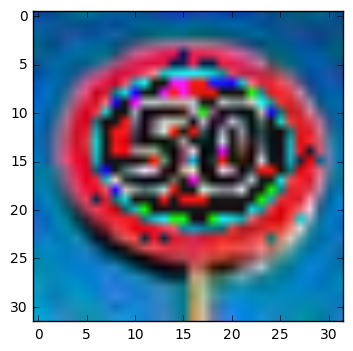

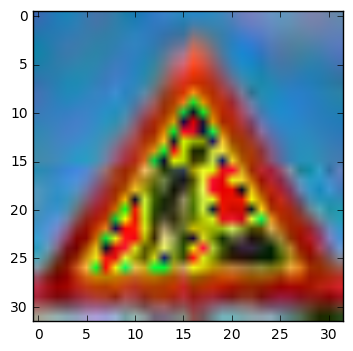

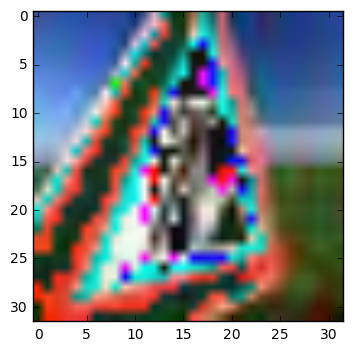

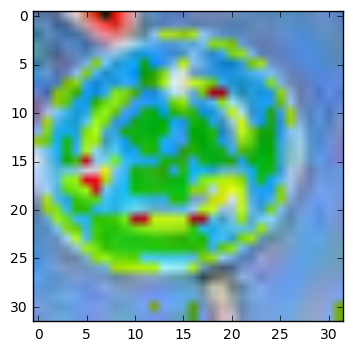

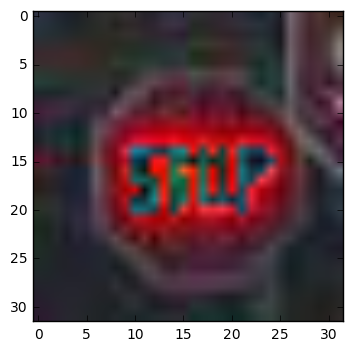

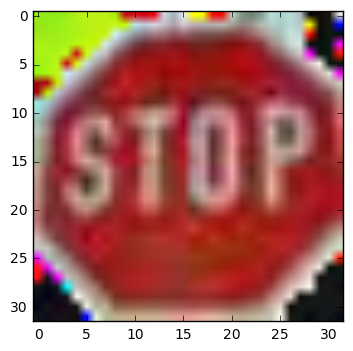

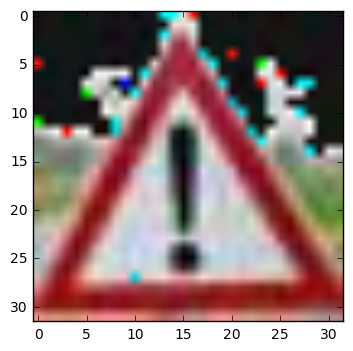

In [28]:
# Show new images
print('\n'*2 + 'New images' + '\n'*2)
for i in range(7):
    
    #k = randrange(n_train)
    #label = 'Exapmle: ' + str(k) +'\nTrafic sign: ' + str(y_train[k]) + '\nSign Name: ' + str(df.loc[y_train[k], "SignName"]) 
    
    #plt.xlabel(label)
    plt.imshow(myTestImagesNP[i])
    plt.figure()

[3 0 6 5 4 6 4]


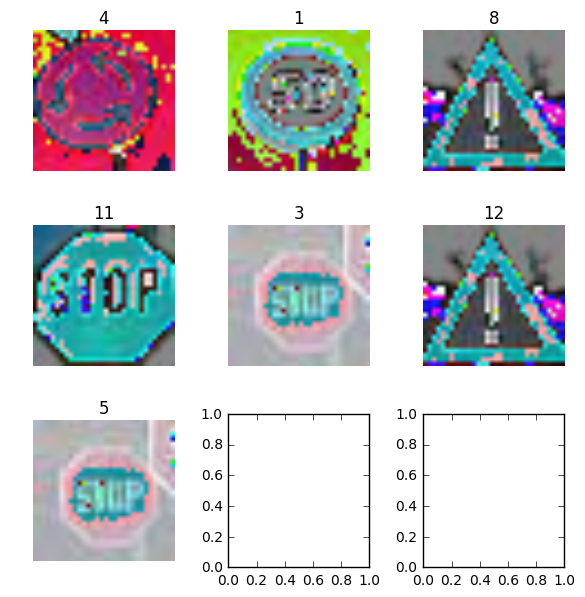

In [29]:
# Show samples of images

# Normalise input (images still in colour)
myTestImagesNP = (myTestImagesNP - myTestImagesNP.mean()) / (np.max(myTestImagesNP) - np.min(myTestImagesNP))

number_samples = 7
random_sample = np.random.randint(0, n_new, number_samples)
print (random_sample)
sample_images = myTestImagesNP[random_sample]
#sample_labels = list(map(label_descriptions.get, y_train[random_sample]))
#sample_labels = list(y_train[random_sample])


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(2*3, 2*3))
axes = axes.ravel()
fig.tight_layout()

for ax, img, label in zip(axes, sample_images, sample_labels):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

### Predict the Sign Type for Each Image

In [30]:
from random import randrange
X_predict=[]
y_predict=[]
for i in range(20):
    r = randrange(len(X_test))
    X_predict.append(X_test_original[r])
    y_predict.append(y_test_original[r])

predict_count=len(X_predict)
y_predict_df = pd.DataFrame(y_predict)
y_predict_df.columns=['id']

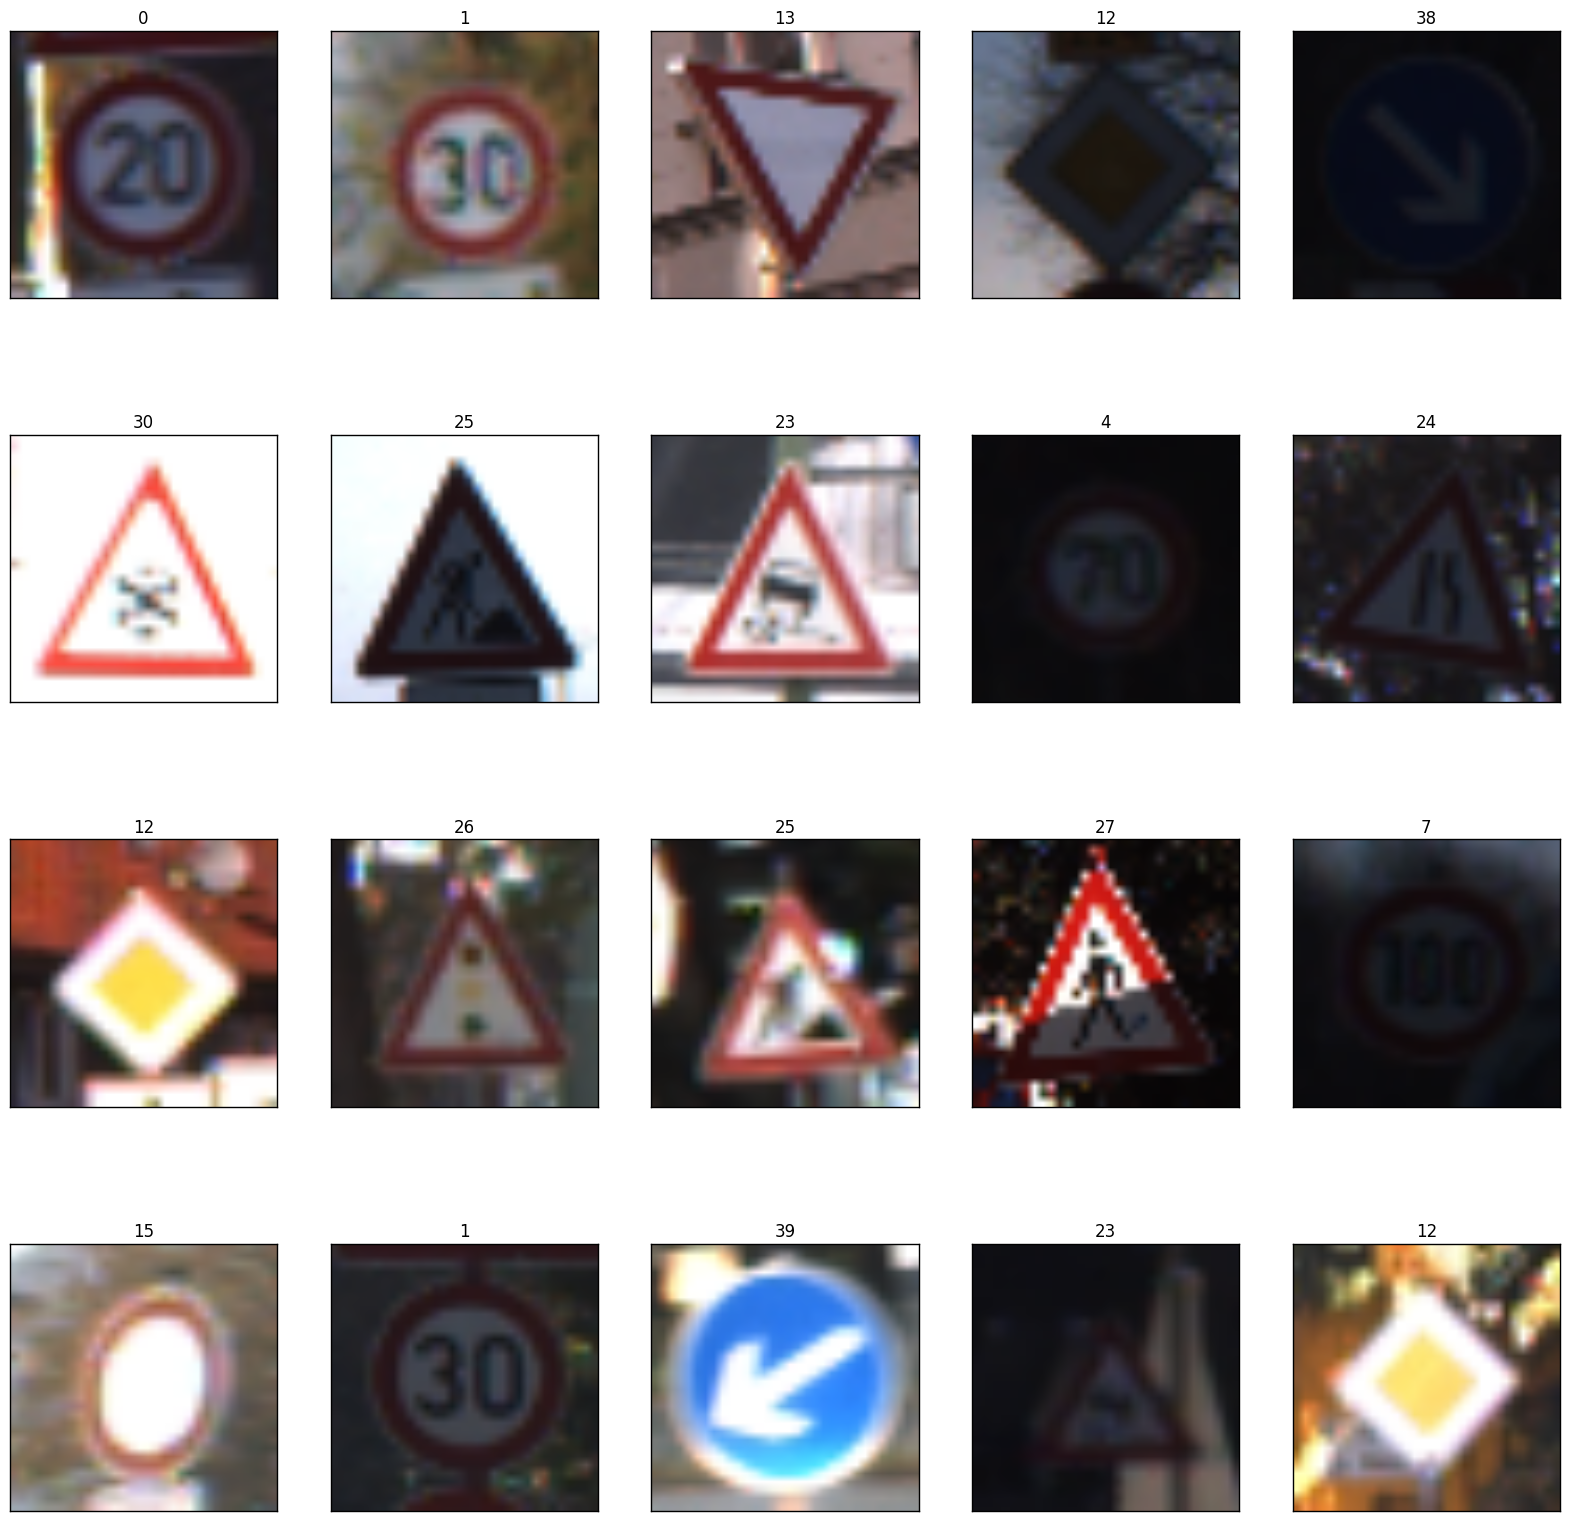

In [31]:
fig = plt.figure(figsize=(20, predict_count), dpi=200)

for i in range(predict_count):
    plt.subplot(4, predict_count/4, i+1)
    plt.title(y_predict_df.iloc[i].id)
    plt.imshow(X_predict[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
print("Number of predictions: %d" % (len(X_predict)))
import tensorflow as tf
keep_prob = 1.0
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, './models/lenet')
    
    print("Model restored.")
   
    #ps=sess.run(tf.argmax(logits,1),feed_dict={x:X_predict, keep_prob: 1.0})
    ps=sess.run(tf.argmax(logits,1),feed_dict={x:X_predict})
    
    
print ('\n',[(p,signnames_df.iloc[p].sign_name) for p in ps])



Number of predictions: 20
Model restored.

 [(1, 'Speed limit (30km/h)'), (1, 'Speed limit (30km/h)'), (13, 'Yield'), (38, 'Keep right'), (38, 'Keep right'), (24, 'Road narrows on the right'), (29, 'Bicycles crossing'), (23, 'Slippery road'), (4, 'Speed limit (70km/h)'), (24, 'Road narrows on the right'), (12, 'Priority road'), (26, 'Traffic signals'), (25, 'Road work'), (31, 'Wild animals crossing'), (7, 'Speed limit (100km/h)'), (9, 'No passing'), (1, 'Speed limit (30km/h)'), (39, 'Keep left'), (23, 'Slippery road'), (12, 'Priority road')]




Sample images




C:\Anaconda3\envs\sdc\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


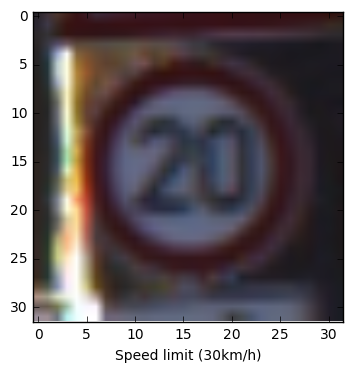

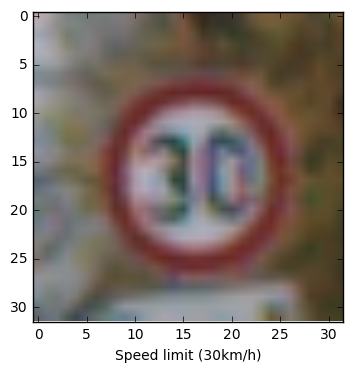

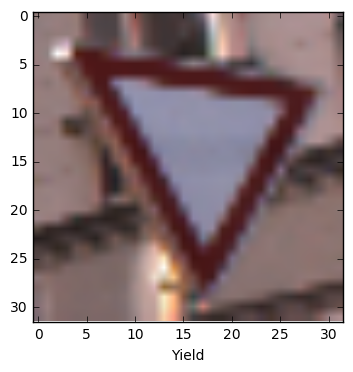

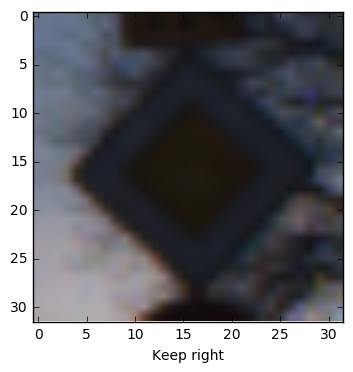

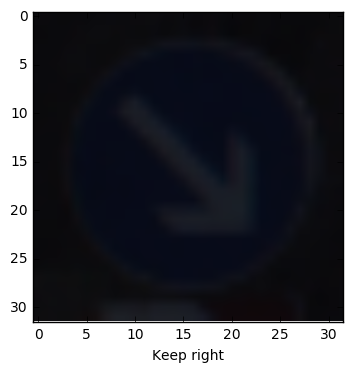

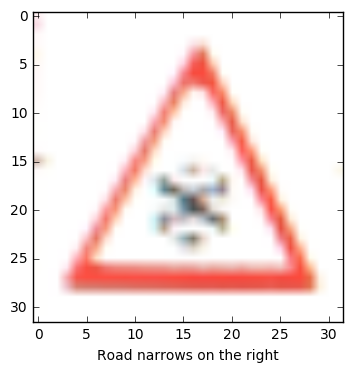

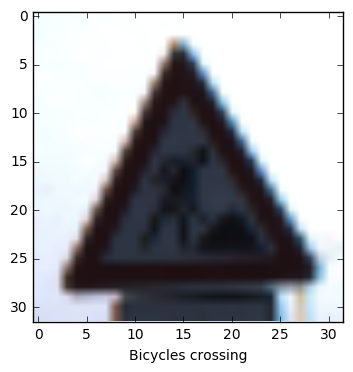

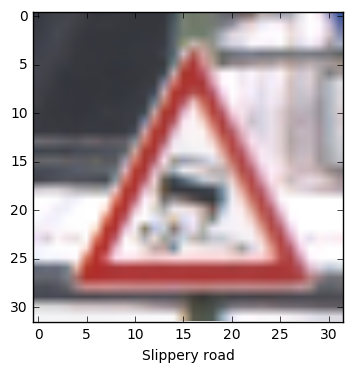

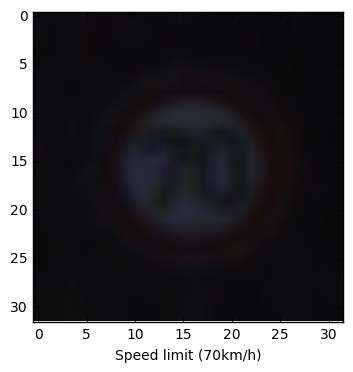

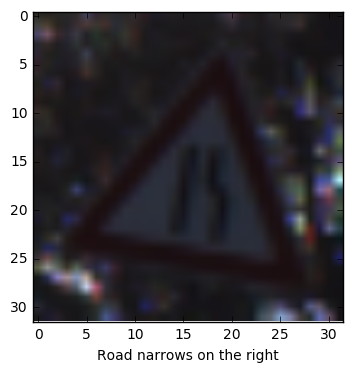

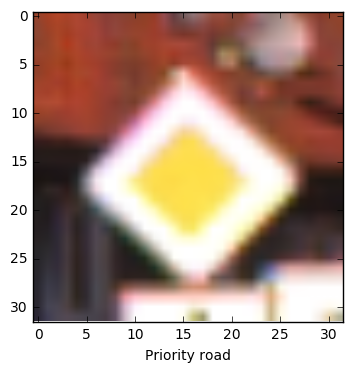

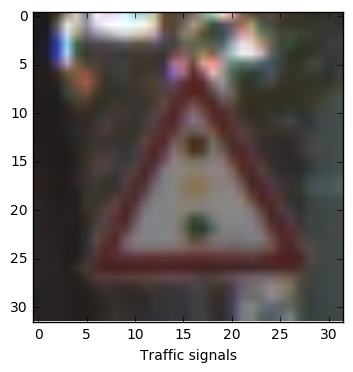

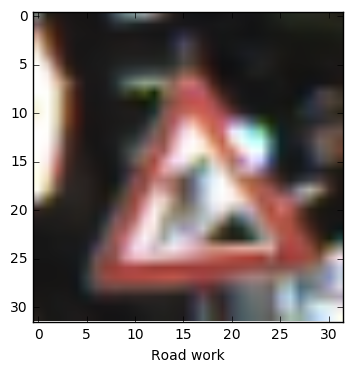

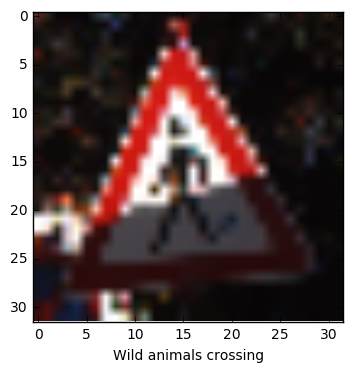

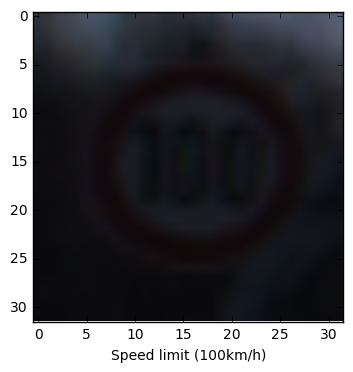

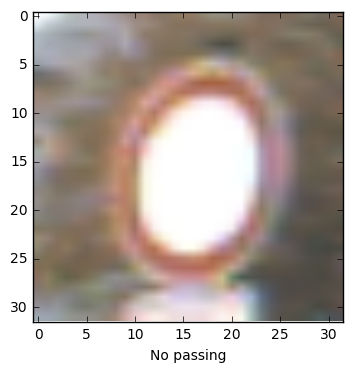

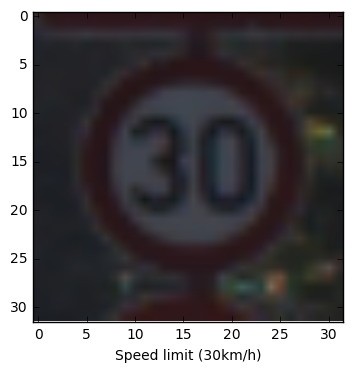

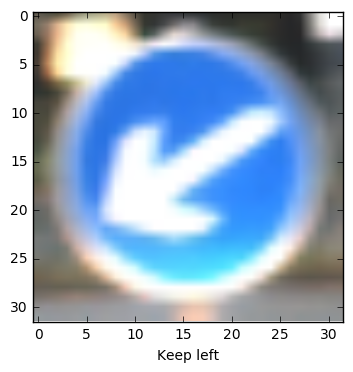

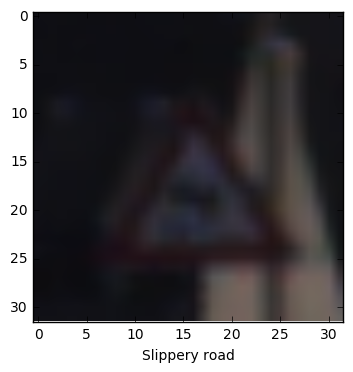

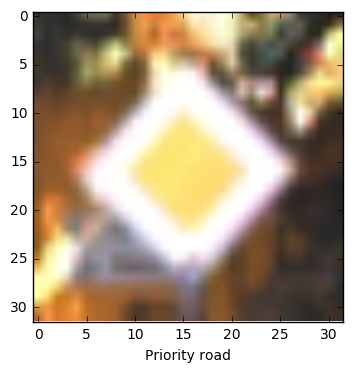

In [33]:
# Show samples of images
print('\n'*2 + 'Sample images' + '\n'*2)
for i in range(predict_count):
    #print ('\n',(p,signnames_df.iloc[ps[i]].sign_name))
    #k = randrange(n_train)
    #label = 'Exapmle: ' + str(k) +'\nTrafic sign: ' + str(y_train[k]) + '\nSign Name: ' + str(df.loc[y_train[k], "SignName"]) 
    label = (signnames_df.iloc[ps[i]].sign_name)
    plt.xlabel(label)
    plt.imshow(X_predict[i])
    plt.figure()

In [34]:
from random import randrange
X_predict=[]
y_predict=[]
predict_count = len(myTestImagesNP)
for i in range(len(myTestImagesNP)):
    #r = randrange(len(myTestImagesNP))
    X_predict.append(myTestImagesNP[i])
#    y_predict.append(y_test_original[r])

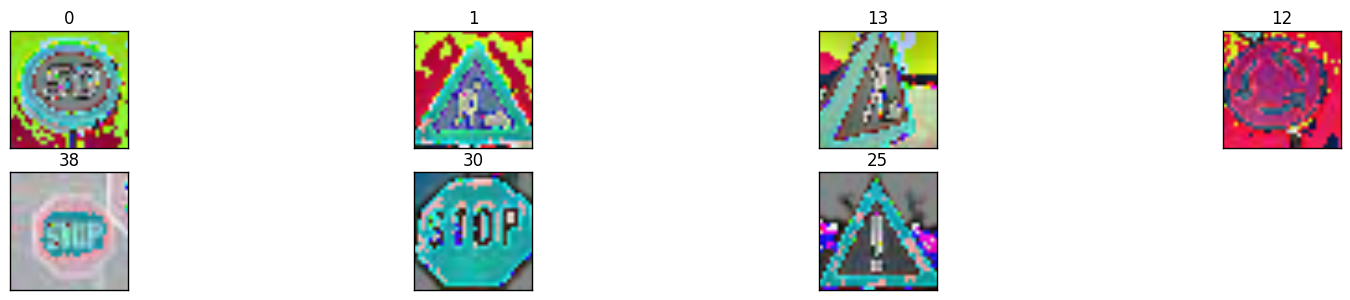

In [35]:
fig = plt.figure(figsize=(20, predict_count), dpi=200)

for i in range(predict_count):
    plt.subplot(4, 4, i+1)
    plt.title(y_predict_df.iloc[i].id)
    plt.imshow(X_predict[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [36]:
print("Number of predictions: %d" % (len(X_predict)))
import tensorflow as tf
keep_prob = 1.0
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, './models/lenet')
    print("Model restored.")
   
    #ps=sess.run(tf.argmax(logits,1),feed_dict={x:X_predict, keep_prob: 1.0})
    ps=sess.run(tf.argmax(logits,1),feed_dict={x:X_predict})
    
    
print ('\n',[(p,signnames_df.iloc[p].sign_name) for p in ps])



Number of predictions: 7
Model restored.

 [(9, 'No passing'), (25, 'Road work'), (18, 'General caution'), (38, 'Keep right'), (17, 'No entry'), (14, 'Stop'), (18, 'General caution')]




Sample images




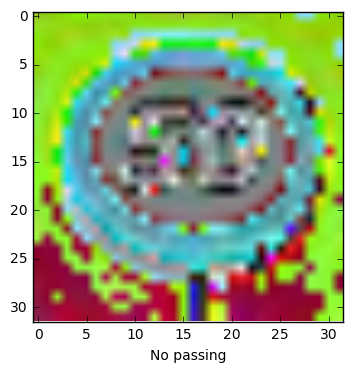

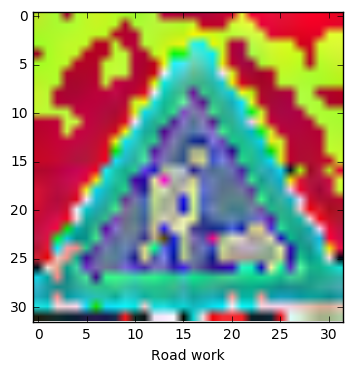

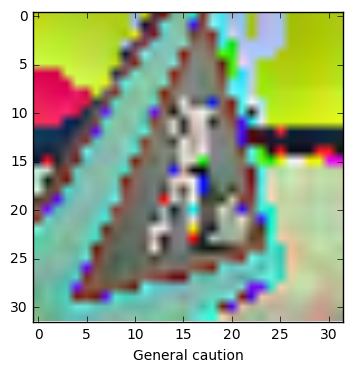

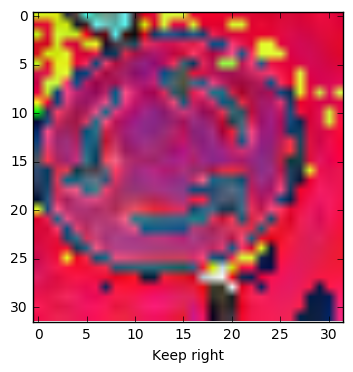

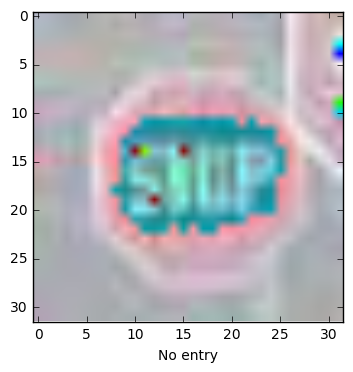

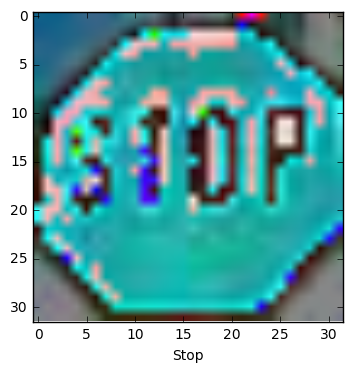

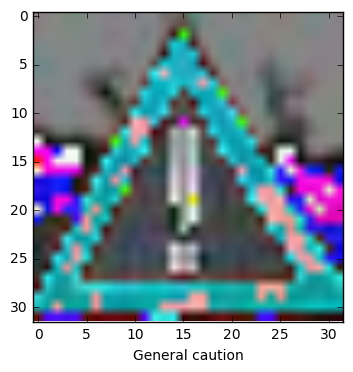

In [37]:
# Show samples of images
print('\n'*2 + 'Sample images' + '\n'*2)
for i in range(predict_count):
    #print ('\n',(p,signnames_df.iloc[ps[i]].sign_name))
    #k = randrange(n_train)
    #label = 'Exapmle: ' + str(k) +'\nTrafic sign: ' + str(y_train[k]) + '\nSign Name: ' + str(df.loc[y_train[k], "SignName"]) 
    label = (signnames_df.iloc[ps[i]].sign_name)
    plt.xlabel(label)
    plt.imshow(X_predict[i])
    plt.figure()

### Analyze Performance

In [44]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
matches=[False, True, False, True, False, True, True]
print("Accuracy %d%%" % (matches.count(True)/len(matches) *100))

Accuracy 57%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [39]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def softmax_image_explore(timage):
    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, './models/lenet')
        #saver.restore(sess, os.getcwd() + "/cnn-run")
        print("Model restored.")
    
        image_logits=sess.run(logits,feed_dict={x:[timage]})
        #image_logits=sess.run(logits,feed_dict={x:[timage]})
        #, keep_prob: 1.0
        print(image_logits)
            
        softmax=sess.run(tf.nn.softmax(image_logits))
        print(softmax)

        # experimented with softmax calculations 
        # per https://carnd-forums.udacity.com/questions/12619143/one-reason-for-low-accuracy-ill-conditioned-value-for-log-calculation
        # eventually realised I'd not normalised my captured test images 
        # - hence it was giving me large logit values
        image_logits -= np.max(image_logits)
        print(image_logits)

        predictions=sess.run(tf.nn.softmax(image_logits))
        print(predictions)

        probs = np.exp(image_logits) / np.sum(np.exp(image_logits))
        print(probs)

In [40]:
print(X_predict[1].shape)
for i in range(7):
    softmax_image_explore((X_predict[i]))

(32, 32, 3)
Model restored.
[[ 29.11097717  32.26059341  36.35190201 ..., -53.84881973 -57.22297668
  -41.26227188]]
[[  5.21040425e-14   1.21543671e-12   7.27051405e-11 ...,   0.00000000e+00
    0.00000000e+00   1.40129846e-44]]
[[ -30.58549881  -27.43588257  -23.34457397 ..., -113.54529572
  -116.91944885 -100.95874786]]
[[  5.21040425e-14   1.21543671e-12   7.27051405e-11 ...,   0.00000000e+00
    0.00000000e+00   1.40129846e-44]]
[[  5.21040493e-14   1.21543682e-12   7.27051475e-11 ...,   0.00000000e+00
    0.00000000e+00   1.40129846e-44]]
Model restored.
[[-10.78757191  -4.98409462   6.93803215 ..., -45.17376709 -39.80476379
  -38.18050766]]
[[  1.91188317e-27   6.33692064e-25   9.54096162e-20 ...,   2.22666326e-42
    4.78027748e-40   2.42582981e-39]]
[[-61.44181824 -55.63834381 -43.71621704 ..., -95.82801819 -90.45901489
  -88.83475494]]
[[  1.91188317e-27   6.33692064e-25   9.54096162e-20 ...,   2.22666326e-42
    4.78027748e-40   2.42582981e-39]]
[[  1.91188317e-27   6.336921

In [41]:
from pylab import *
from matplotlib import gridspec
    
def topk_plot(test_images):
    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, './models/lenet')
        #saver.restore(sess, os.getcwd() + "/cnn-run")
        print("Model restored.")

        #image_logits=sess.run(logits,feed_dict={x:test_images, keep_prob: 1.0})
        #image_logits -= np.max(image_logits)
        
        #softmax=tf.nn.softmax(logits/tf.reduce_sum(logits,1))
        softmax=tf.nn.softmax(logits)

        #probabilities=logits/tf.reduce_sum(logits,1)
        #probs=sess.run(tf.nn.softmax(image_logits))
        #probs=sess.run(softmax,feed_dict={x:test_images, keep_prob: 1.0})
        probs=sess.run(softmax,feed_dict={x:test_images})
        print("Softmax\n",probs)
        (values,indices)=sess.run(tf.nn.top_k(probs, k = 5))
        print("top_k values, indices")
        print(values,indices)

    indices_names=np.array([signnames_df.iloc[i].sign_name for i in indices.reshape(25)])
    image_values=np.array([p for p in zip(indices_names,values.reshape(25))])

    image_values=image_values.reshape(5,5,2)

    pos = arange(5) + .5    # the bar centers on the y axis

    fig = plt.figure(figsize=(10,6))
    gs = gridspec.GridSpec(len(test_images),2,width_ratios=[1,5])

    for i in range(len(image_values)):
        values=[float(v[1]) for v in image_values[i]]
        labels=[v[0] for v in image_values[i]]

        plt.subplot(gs[i*2])
        plt.imshow(test_images[i])
        plt.xticks([]), plt.yticks([])
        plt.subplot(gs[i*2+1])
        plt.tight_layout()
        barh(-pos,values, align='center')
        yticks(-pos, labels)
        xlabel('softmax probabilities')

    show()

Model restored.
Softmax
 [[  5.21036495e-14   1.21542294e-12   7.27045923e-11 ...,   0.00000000e+00
    0.00000000e+00   1.40129846e-44]
 [  1.91189569e-27   6.33696107e-25   9.54102301e-20 ...,   2.22666326e-42
    4.78034754e-40   2.42588026e-39]
 [  1.50454393e-09   1.46155104e-01   4.09212018e-14 ...,   2.73253201e-43
    2.92871379e-43   0.00000000e+00]
 [  3.75595667e-27   3.82129732e-18   9.63707416e-15 ...,   3.43950729e-31
    5.63560782e-34   7.62861874e-29]
 [  3.87290514e-13   9.86157445e-13   2.59031596e-16 ...,   1.15796006e-26
    1.79831263e-27   7.20329998e-29]]
top_k values, indices
[[  9.99965072e-01   1.40985585e-05   1.13367669e-05   9.56408439e-06
    8.49248494e-09]
 [  9.23216283e-01   7.11134374e-02   5.44983335e-03   9.97448587e-05
    6.82248574e-05]
 [  8.52470160e-01   1.46155104e-01   1.37355935e-03   5.36789969e-07
    4.65106240e-07]
 [  9.32063520e-01   6.79167807e-02   1.55295311e-05   1.78382697e-06
    1.35523010e-06]
 [  9.79321778e-01   2.01562345e

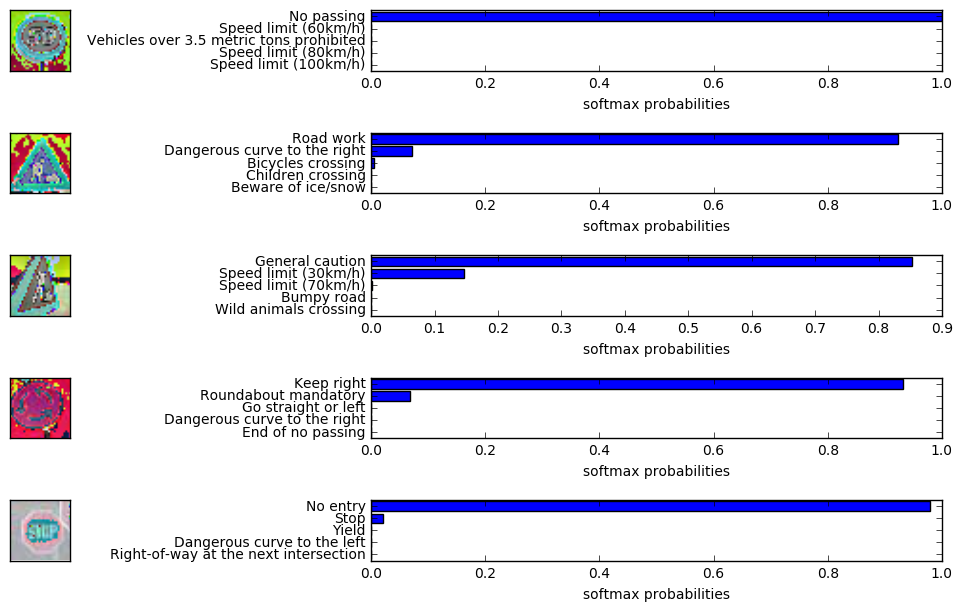

In [42]:
# plot top_k of 5 test images - for reference
#for i in range (7):
topk_plot(X_predict[0:5])

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 